# Table of Contents
1.Problem Statement
2.Assumptions
3.Analysis


## 1. Problem Statement

Unnecessary procedures are taking a toll on the healthcare system as well as putting people in unnecessary risks. So how many of the colonoscopy and colectomy were necessary? To measure physician error we take all their benign patients and measure what percentage of those patients got unnecessary procedures.

## 2. Assumptions 

#### PREFACE
I'm putting in the email conversations because I don't want to misquote P, but rather show the conversation, and what I got out of this conversation.

ME: so for diagnosis, can I assume if it's benign or malignant than it will be listed in DA or would it not be listed in DA and listed in D1-25? Same question about (ICD-9-PCS == 45.23 or 45.8 or 45.7) being in P1. Or would I have to check all the other boxes to see if these variables are listed in any of the p(1-25)"

Pedro: You can assume that it will be listed in one of DA - D25. It's not guaranteed to be in any particular one of those if it appears. Sometimes DA is duplicated amongst D1-D25, but most often not.
The same goes for the PCS codes. They are in one of P1-P25, but not guaranteed in any particular place.

#### FIRST
First, DA is not the same thing as D1-25. I looked through the database and DA had a different set of codes from D1-25. 

#### SECOND
Second, it seems that D1-25 (medical_header table)  doesn’t have any specific system of organizations but they all list diagnoses or are blank. Codes 211.3 and 211.4 indicate that the neoplasms benign and code 152* indicates the neoplasms are malignant. So I checked D1-25 for that encounter_key. If any of them had 152.* It was a malignant tumor. If that patient ever had a 152.* under diagnosis a colonoscopy or colectomy would not be a farfetch procedure since they are more likely to have the potential cancer recur. So even if that patient has a diagnosis of benign (211.3, 211.4) I wouldn’t consider them part of the benign demographic. They will not be part of the calculation.  

( More specifically 152.1, 152.2, 152.3, 152.8, 152.9 according to http://www.icd9data.com/2015/Volume1/140-239/150-159/152/default.htm )

#### THIRD
Third, just like P1-15 there doesn’t seem to be a specific system where I can extract significant meaning in each individual column so I check columns P1-15 for codes 45.23, 45.7*, 45.8*. Based on the chart in the Surgery for Benign Colon Polyps
Google doc it looks as if those codes under P1-15 mean there has been a colonoscopy or colectomy. 

#### FOURTH
Fourth, procedures (medical_service_line) with , 45378, 45380-45385, 45388, 44110, 44146 , 44150-44160, 44204-44208 44210-44212 on it’s rows shows that a colonoscopy or colectomy.  So if these are codes are listed under procedure or P1-15 has 45.23, 45.7, 45.8 than I will assume there was colonoscopy or colectomy even if both aren’t true, if just one is true but not the other than I would blame faulty documentation

#### FIFTH

And finally, I am assuming the data is all recorded with the utmost accuracy and minimal biases. 

## 3. Bias vs. Variance Tradeoffs

I had multiple ideas on how to calculate this. 

#### SPECIFICITY
First idea, specificity:
Denominator would be the encounters with benign cases (these people never had a malignant case as well).
Numerator would be all the times either procedure took place.

#### SENSITIVITY
Second idea, sensitivity:
Denominator: All the times a colonoscopy or colectomy were performed on a patient who never had a malignant in that general region (under d1-25 non of the 150.*-159* cases occurred). It would catch all the edge cases.

Numerator would be all the times either procedure took place and every time a colonoscopy was performed.

#### TRADEOFFS

The first case might not catch all the times a colonoscopy/colectomy is misused. It only is stating that a colonoscopy/colectomy is unnecessary when a neoplasm in the colon, rectum, and anal canal are listed as bengin. The diagnosis could be omitted from the data 

The second case will catch all the potential unnecessary colonoscopy and colectomy but at the risk of wrongfully accusing a physician of an unnecessary procedure when it was necessary. We know a colonoscopy/colectomy should not be performed on a benign case but outside of that I can’t definitely state that those procedures should only be done on people with malignant tumors in the digestive organs and peritoneum region.

#### DECISION
Decision, specificity: 

It seemed like the assignment was gearing more towards asking for specificity, and so I’ll go with it. I think in these types of situations it’s best to bring up other options but choose one as a team. In this case the assignment has been declared, it seems arrogant to deviate from the perceived intention of the assignment. Even though sensitivity would potentially optimize the cost of healthcare, I respect the work it takes to be a physician and without further knowledge give them the benefit of doubt. 

It's a large file, it's my first time using SQL and I'm having touble figuring out how to index through the table to make it run faster. I'm trying to write code so it would filter and look for specific numbers and create a bool_column to contain the info of had_procedure and benign. That's what I'm trying to achieve. After that I want to merge the tables on encounter key. Everyone who has a true on the procedure.medical_service_lines,(P1-P15).headers be true AND (D1-D25).medical_headers is true (meaning they had a benign case and never had a malignant case in the colon area) they would be the numerator. Everyone on the (D1-D25) would be the denomonator, and group it by the doctor_id.

Actually, grab everyone who is benign for colon cancer (never malignant diagnosis), that should cut the runtime. 



## 4. Findings

If seems that the more patients a doctor has with a benign colon case the doctor is more likely to perform a colonoscopy or colectomy.

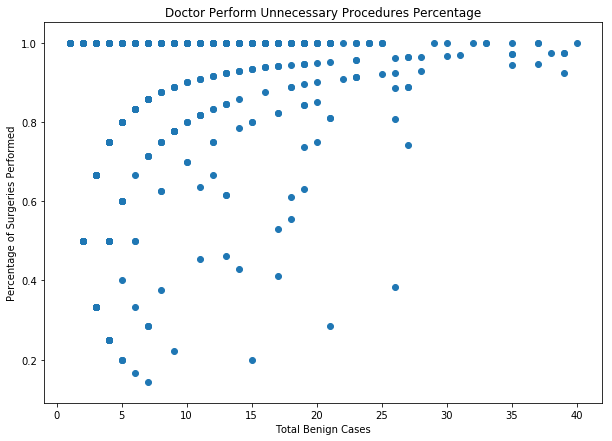


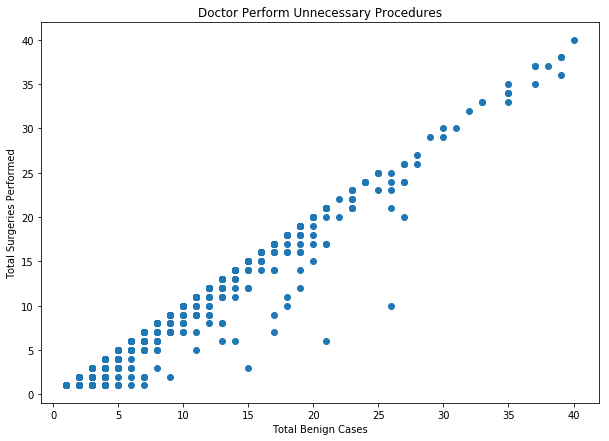




## 5. Conclusion

Although the tumor is benign we can't assume it is not affecting the patient, the patient might have gone in to see the doctor because they were feeling discomfort (I understand it is also part of a routine checkup). Even a benign mass in a person's colon could be uncomfortable even if it's not deadly.

There’s a very low percentage of death from colonoscopies. I googled it and it said 30 out of 100,000 (https://robertclaremd.com/im-skeptical-about-screening-colonoscopies/).
Even if it’s a benign tumor the tumor still can be causing the patient discomfort. The highest risk of death is the uncertainty of anesthetic. But it's a 4.0-4.3% chance of colorectal cancer. https://www.cancer.org/cancer/colon-rectal-cancer/about/key-statistics.html. There's a greater chance of getting colon cancer than there is of dying from a colonoscopy. Regardless the chances of getting colorectal cancer is also very low, so we could categorize the procedure as ‘not-essential’ but maybe the percentage is low because colonoscopies are considered routine. The fact that most doctors have a high percentage of performing colon-related procedures when they see a patient goes to show how common it is. The only doctors who have not done a colon-related procedure are those who didn’t have many benign cases to begin with. Would it be considered selective even if the benign tumor was physically affecting the patient?

## 6. Long way to go...
I was not able to build a pipeline that a user can easily input information. That seemed to be the goal of the assignment. But I had to be able to understand as much about the data to feel confident on how and why I want that pipeline built. I'm working on building that pipeline and trying to anticipate whatever information the user wants and output the correct data. I also want to work on shortening the runtime on running the database.

